# Saudi Stock Exchange (Tadawul)

![](https://media-exp1.licdn.com/dms/image/C4D1BAQEso88yXUpZYA/company-background_10000/0?e=2159024400&v=beta&t=9av-KW2y1WiBELtH3OP6BEpckbQJStB4FbpvebKD0W4)

### Group: Warrior

Team Members :

- Razan Alsallumi
- Waad Alsaleh
- Reem Alamri
- Marwah Alkhalaf





## Business Problem:

Predicting the Saudi Stock Exchange (Tadawul) is a tempting challenge for data scientists. So, when we see the Tadawul, We see the daily up and downs. Therefore, we chose to work on models that predict time series to know the daily closing prices of Riyadh Bank in the Saudi stock market (Tadawul).

## Code: 

In [35]:
# Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import datetime


# spilt Data
from sklearn.model_selection import TimeSeriesSplit

#models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Scores
from sklearn.metrics import mean_absolute_error

#GUI

from tkinter import ttk
from tkinter import *
from PIL import ImageTk, Image
from tkinter import filedialog
from tkinter import messagebox as msg
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
import webbrowser




In [3]:
pd.options.mode.chained_assignment = None 

In [4]:
# Load Data 

df = pd.read_csv('./data/Tadawul_stcks.csv')
df["date"]=pd.to_datetime(df.date,format="%Y-%m-%d")
print(df.shape)

df.sample(5)

(593819, 14)


,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
17146,1201,Takween Advanced Industries Co.,TAKWEEN,Materials,2014-10-27,35.90,35.90,35.20,35.26,-0.60,-1.67,437257.0,1.555004e+07,395.0
38975,2010,Saudi Basic Industries Corp.,SABIC,Materials,2008-06-24,150.00,151.25,149.25,151.00,1.00,0.67,5129747.0,7.699391e+08,4523.0
152166,3090,Tabuk Cement Co.,TCC,Materials,2015-04-16,23.75,23.80,23.70,23.75,0.08,0.34,168070.0,3.991059e+06,110.0
436812,8010,The Company for Cooperative Insurance,TAWUNIYA,Financials,2007-11-26,57.50,58.50,57.50,58.00,0.00,0.00,144301.0,8.332264e+06,106.0
370506,2070,Saudi Pharmaceutical Industries and Medical Ap...,SPIMACO,Health Care,2002-01-13,12.95,12.95,12.95,12.97,0.00,0.00,376394.0,4.892199e+06,56.0


## Slecte and Save data

In [5]:
Financials_df = df[df['sectoer']=='Financials']
Financials_df.sort_values('date', inplace=True)
Financials_df = Financials_df.set_index('date')
Financials_df.head()

,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
date,,,,,,,,,,,,,
2001-12-31,1020,Bank Aljazira,BJAZ,Financials,2.38,2.38,2.38,2.38,-101.37,-97.71,39118.0,92981.25,3.0
2001-12-31,1120,Al Rajhi Bank,ALRAJHI,Financials,12.62,12.62,12.29,12.30,-681.20,-98.23,1274457.0,15822058.25,NaN
2001-12-31,4130,Al-Baha Investment and Development Co.,ALBAHA,Financials,5.40,5.40,5.40,5.42,-9.83,-64.46,251285.0,1355925.00,20.0
2001-12-31,1060,Saudi British Bank,SABB,Financials,8.90,8.90,8.90,8.90,-323.10,-97.32,516587.0,4613774.75,21.0
2001-12-31,1080,Arab National Bank,ANB,Financials,5.83,5.83,5.77,5.83,-286.42,-98.01,427732.0,2503457.00,26.0


In [6]:
Financials_df['name'].value_counts()

Samba Financial Group                                       4759
Riyad Bank                                                  4759
Al Rajhi Bank                                               4758
Al-Baha Investment and Development Co.                      4754
Saudi Investment Bank                                       4754
Banque Saudi Fransi                                         4750
Bank Aljazira                                               4747
Arab National Bank                                          4737
Saudi British Bank                                          4733
Aseer Trading, Tourism and Manufacturing Co.                4713
Saudi Advanced Industries Co.                               4595
The Company for Cooperative Insurance                       3842
Bank Albilad                                                3761
Malath Cooperative Insurance Co.                            3206
The Mediterranean and Gulf Insurance and Reinsurance Co.    3204
SABB Takaful Co.         

In [7]:
Financials_df['trading_name '].unique()

array(['BJAZ', 'ALRAJHI', 'ALBAHA', 'SABB', 'ANB', 'SAIB', 'BSFR', 'RIBL',
       'SAMBA', 'SAIC', 'ASEER', 'TAWUNIYA', 'ALBILAD',
       'MALATH INSURANCE', 'MEDGULF', 'SABB TAKAFUL', 'SALAMA',
       'ARABIAN SHIELD', 'WALAA', 'ALLIANZ SF', 'KINGDOM', 'ATC',
       'WAFA INSURANCE', 'ACIG', 'SAICO', 'GULF UNION', 'ALAHLIA', 'AICC',
       'ALETIHAD', 'ALSAGR INSURANCE', 'BUPA ARABIA', 'SAUDI RE',
       'ALINMA', 'UCA', 'ALRAJHI TAKAFUL', 'AXA COOPERATIVE', 'CHUBB',
       'ALALAMIYA', 'GULF GENERAL', 'BURUJ', 'WATANIYA', 'SOLIDARITY',
       'AMANA INSURANCE', 'ENAYA', 'ALINMA TOKIO M', 'JAZIRA TAKAFUL',
       'NCB'], dtype=object)

In [8]:
banks_name=['1- Bank Aljazira', '2- Al Rajhi Bank','3- Saudi British Bank','4- Arab National Bank', '5- Saudi Investment Bank',
          '6- Banque Saudi Fransi', '7- Riyad Bank', '8- Bank Albilad','9- Alinma Bank', ]
banks_trading_name=['BJAZ','ALRAJHI','SABB','ANB','SAIB','BSFR','RIBL','ALBILAD','ALINMA']

In [9]:
df_BJAZ = Financials_df[Financials_df['trading_name ']== 'BJAZ']# Bank Aljazira
df_ALRAJHI = Financials_df[Financials_df['trading_name ']== 'ALRAJHI']# Al Rajhi Bank
df_SABB = Financials_df[Financials_df['trading_name ']== 'SABB']# Saudi British Bank
df_ANB = Financials_df[Financials_df['trading_name ']== 'ANB']# Arab National Bank
df_SAIB = Financials_df[Financials_df['trading_name ']== 'SAIB']# Saudi Investment Bank
df_BSFR = Financials_df[Financials_df['trading_name ']== 'BSFR']# Banque Saudi Fransi
df_RIBL = Financials_df[Financials_df['trading_name ']== 'RIBL']# Riyad Bank
df_ALBILAD=Financials_df[Financials_df['trading_name ']== 'ALBILAD']# Bank Albilad
df_ALINMA =Financials_df[Financials_df['trading_name ']== 'ALINMA']# Alinma Bank
df_NCB = Financials_df[Financials_df['trading_name ']== 'NCB']# National Commercial Bank

## Handle With Missing Values

In [16]:
#Replace missing values in [high,low] with previous value
def high_low_null(df):
    df['high'] = df['high'].fillna(method='ffill')
    df['low'] = df['low'].fillna(method='ffill')
    return df

#Replace missing values in [open] with previous value of [close]
def open_null(df):
    df['open']=df['open'].replace(np.nan,0)
    OpenData = df['open'].tolist()
    CloseData = df['close'].tolist()
    for i in range(1,len(OpenData)):
        if  OpenData[i] == 0:
            OpenData[i] = CloseData[i-1]
    df['open'] = OpenData
    return df

#reset [change, perc_Change] after change missing value
def rest_change(df):
    # change = close-open
    df['change']=df['close'] - df['open']
    #Percentage Change in Stock Price = 100 * (close - open) / open
    df['perc_Change']=(df['change'] / df['open']) * 100
    return df


1. Bank Aljazira

In [17]:
df_BJAZ.isnull().sum()

symbol             0
name               0
trading_name       0
sectoer            0
open              19
high               0
low                0
close              0
change             0
perc_Change        0
volume_traded      0
value_traded       0
no_trades          0
dtype: int64

In [18]:
df_BJAZ = high_low_null(df_BJAZ)
df_BJAZ = open_null(df_BJAZ)
df_BJAZ = rest_change(df_BJAZ)


2. Al Rajhi Bank

In [19]:
df_ALRAJHI.isnull().sum()

symbol               0
name                 0
trading_name         0
sectoer              0
open                 0
high                 0
low                  0
close                0
change               0
perc_Change          0
volume_traded        0
value_traded         0
no_trades         4758
dtype: int64


3. Saudi British Bank

In [20]:
df_SABB.isnull().sum()

symbol             0
name               0
trading_name       0
sectoer            0
open              17
high              17
low               17
close              0
change             0
perc_Change        0
volume_traded      0
value_traded       0
no_trades          0
dtype: int64

In [21]:
df_SABB = high_low_null(df_SABB)
df_SABB = open_null(df_SABB)
df_SABB = rest_change(df_SABB)

4. Arab National Bank

In [22]:
df_ANB.isnull().sum()

symbol             0
name               0
trading_name       0
sectoer            0
open              12
high              12
low               12
close              0
change             0
perc_Change        0
volume_traded      0
value_traded       0
no_trades          0
dtype: int64

In [23]:
df_ANB = high_low_null(df_ANB)
df_ANB = open_null(df_ANB)
df_ANB = rest_change(df_ANB)

5. Saudi Investment Bank

In [24]:
df_SAIB.isnull().sum()

symbol            0
name              0
trading_name      0
sectoer           0
open              6
high              6
low               6
close             0
change            0
perc_Change       0
volume_traded     0
value_traded      0
no_trades         0
dtype: int64

In [25]:
df_SAIB = high_low_null(df_SAIB)
df_SAIB = open_null(df_SAIB)
df_SAIB = rest_change(df_SAIB)

6. Banque Saudi Fransi

In [26]:
df_BSFR.isnull().sum()

symbol            0
name              0
trading_name      0
sectoer           0
open              9
high              9
low               9
close             0
change            0
perc_Change       0
volume_traded     0
value_traded      0
no_trades         0
dtype: int64

In [27]:
df_BSFR = high_low_null(df_BSFR)
df_BSFR = open_null(df_BSFR)
df_BSFR = rest_change(df_BSFR)

7. Riyad Bank

In [28]:
df_RIBL.isnull().sum()

symbol            0
name              0
trading_name      0
sectoer           0
open              0
high              0
low               0
close             0
change            0
perc_Change       0
volume_traded     0
value_traded      0
no_trades         0
dtype: int64

8. Bank Albilad

In [29]:
df_ALBILAD.isnull().sum()

symbol            0
name              0
trading_name      0
sectoer           0
open              1
high              1
low               1
close             0
change            0
perc_Change       0
volume_traded     0
value_traded      0
no_trades         0
dtype: int64

In [30]:
df_ALBILAD = high_low_null(df_ALBILAD)
df_ALBILAD = open_null(df_ALBILAD)
df_ALBILAD = rest_change(df_ALBILAD)

9. Alinma Bank

In [31]:
df_ALINMA.isnull().sum()

symbol               0
name                 0
trading_name         0
sectoer              0
open                 0
high                 0
low                  0
close                0
change               0
perc_Change          0
volume_traded        0
value_traded         0
no_trades         2933
dtype: int64

----------------------

## EDA: 

### 1- plot The correlations to show features importance

In [32]:
corr = df.corr()
#sns.heatmap(corr, annot = True);
corr.style.background_gradient(cmap='coolwarm')


,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
symbol,1.000000,0.001565,0.002273,0.000961,0.000417,0.001193,-0.000930,-0.056690,-0.046805,0.023714
open,0.001565,1.000000,0.999429,0.999489,0.998964,-0.008661,-0.000219,-0.040639,0.185445,0.138096
high,0.002273,0.999429,1.000000,0.999036,0.999421,0.007538,0.004528,-0.038997,0.190095,0.142394
low,0.000961,0.999489,0.999036,1.000000,0.999313,0.001415,0.003711,-0.041627,0.183710,0.135165
close,0.000417,0.998964,0.999421,0.999313,1.000000,0.025722,0.009379,-0.038995,0.188947,0.139683
change,0.001193,-0.008661,0.007538,0.001415,0.025722,1.000000,0.295720,0.020219,0.090844,0.095797
perc_Change,-0.000930,-0.000219,0.004528,0.003711,0.009379,0.295720,1.000000,0.065170,0.090012,0.081727
volume_traded,-0.056690,-0.040639,-0.038997,-0.041627,-0.038995,0.020219,0.065170,1.000000,0.680990,0.470217
value_traded,-0.046805,0.185445,0.190095,0.183710,0.188947,0.090844,0.090012,0.680990,1.000000,0.602292
no_trades,0.023714,0.138096,0.142394,0.135165,0.139683,0.095797,0.081727,0.470217,0.602292,1.000000


### 2- EDA function to implementation with each bank's dataframe

In [94]:
# EDA: 
def eda(name):
    
    """
    This Function receiving specific dataframe bank then plotting.  
    """
    #1: 

    bank_df= Financials_df[Financials_df['trading_name '].isin(['BJAZ','ALRAJHI','SABB','ANB','SAIB','BSFR','RIBL','ALBILAD','ALINMA'])]

    plt.figure(figsize=(17, 6))

    sns.lineplot(x=bank_df.index, y="close", hue="name", markers=True, data=bank_df)
    plt.title('Closing price of Saudi banks Stocks in the Financial Sector'  , fontsize = 30)
    plt.ylabel('Closing price ($)',fontsize = 20)
    plt.xlabel('Year',fontsize = 20)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    plt.grid(False)
    plt.savefig('./image/s1.png' , edgecolor='none' , dpi=150)
    plt.show()

    #2: 

    plt.figure(figsize=(17, 6))

    Financials_df.groupby('date')['close'].mean().plot(color="b",label='Mean of other banks')
    plt.plot(name["close"], color="r" , label=name["name"][0])
    plt.legend()
    plt.title(f'Closing price of {name["name"][0]} and mean of Closing price in the Financial Sector' , fontsize = 25)
    plt.ylabel('Closing price ($)',fontsize = 20)
    plt.xlabel('Year',fontsize = 20)
    plt.savefig('./image/s2.png' , dpi=150 , edgecolor='none')
    plt.show()


    #3: 

    plt.figure(figsize=(18,10))
    plt.plot(name["close"],label='Close Price' , color = "r")
    plt.plot(name["open"],label='Open Price' , color = "b")
    plt.ylabel("Open/ Close price" ,fontsize = 20)
    plt.xlabel("Years" ,fontsize = 20)
    plt.legend()
    plt.title(f'{name["name"][0]} Close and Open Price history',fontsize = 30)
    plt.savefig('./image/s3.png', dpi=150 , edgecolor='none' ) # Save figure
    plt.show()


    #4: 


    d1=name["2002-1-3":"2020-12-31"]
    plt.figure(figsize=(16,8))
    plt.plot(d1["perc_Change"],label='perc_Change' , color = "b")
    plt.ylabel("Percentage of the change" ,fontsize = 20)
    plt.xlabel("Years" ,fontsize = 20)
    plt.legend()
    plt.title(f'{name["name"][0]} Price Change history' ,fontsize = 20);
    plt.savefig('./image/s4.png', dpi=150 , edgecolor='none' ) # Save figure
    plt.show()


    #5: 

    def col_c(start,end , df):
        """""
        This method receives 3 parameters start date, end date as String data type, and data frame.
        Then, returns the latter "b" when the summation of the change column is positive. Otherwise, return "r"
        """""
        if df[start : end].change.sum() >= 0:
            return "b"
        else:
            return "r"
    fig, ax = plt.subplots(2,3, figsize=(15,12))
    plt.suptitle(f' {name["name"][0]} Stocks from 2015 to 2020'  , y= 1 , fontsize = 30)

    # 1st plot: From 2014 to 2015 
    name["2014-12-31":"2015-12-31"].close.plot(ax=ax[0,0],
                                                   label="Close price" ,
                                                   color=col_c("2014-12-31", "2015-12-31", name ),
#                                                    ylabel= 'Close price',
                                                    xlabel= ' ',
                                              )
    # 2ed plot: From 2015 to 2016 
    name["2015-12-31":"2016-12-31"].close.plot(ax=ax[0,1],
                                                   label="Close price" ,
                                                   color=col_c("2015-12-31" ,"2016-12-31" , name),
#                                                    ylabel= 'Close price',
                                                    xlabel= ' ',
                                              )

    # 3ed plot: From 2016 to 2017 
    name["2016-12-31":"2017-12-31"].close.plot(ax=ax[0,2],
                                                   label="Close price" ,
                                                   color=col_c("2016-12-31" ,"2017-12-31", name ),
#                                                    ylabel= 'Close price',
                                                    xlabel= ' ',
                                              )


    # 4th plot: From 2017 to 2018 
    name["2017-12-31":"2018-12-31"].close.plot(ax=ax[1,0], 
                                                   label="Close price" ,
                                                   color=col_c("2017-12-31" ,"2018-12-31", name ),
#                                                    ylabel= 'Close price',
                                                    xlabel= ' ',
                                              )

    # 5th plot: From 2018 to 2019 
    name["2018-12-31":"2019-12-31"].close.plot(ax=ax[1,1],
                                                   label="Close price" ,
                                                   color=col_c( "2018-12-31","2019-12-31" , name ),
#                                                    ylabel= 'Close price',
                                                    xlabel= ' ',
                                              )
    

    # 6th plot: From 2019 to 2020 
    name["2019-12-31":"2020-12-31"].close.plot(ax=ax[1,2],
                                                   label="Close price" ,
                                                   color=col_c("2019-12-31" , "2020-12-31" , name),
#                                                    ylabel= 'Close price',
                                                    xlabel= ' ',
                                              )

   

    plt.tight_layout()
    fig.text(0.5, 0.005, 'Date', ha='center' , fontsize = 20)
    fig.text(0.0009, 0.5, 'Close Price', va='center', rotation='vertical', fontsize = 20)

    plt.savefig('./image/s5.png', dpi=150 , edgecolor='none' ) # Save figure
    plt.show()


    #6: 
    
    """
    baseline model
    We are going to do a baseline model for a short time and a long time to show which one gives more accurate
    when we do predictions. 
    """

    d_short=name.loc[:, 15] = name.close.rolling(15).mean()
    d_long=name.loc[:, 150] = name.close.rolling(150).mean()
    plt.figure(figsize=(18,10))
    name.close.plot(label="actual" , color = "lightblue")
    d_short.plot(label="short time" , color ="orange")
    d_long.plot(label="long time" , color = "r")
    plt.ylabel("Close price",fontsize = 20)
    plt.xlabel("Years" ,fontsize = 20)
    plt.title(f'Baseline Model For Close price in {name["name"][0]}' ,fontsize = 30);
    plt.legend(["Actual" , "Rolling 15 Days" , "Rolling 150 Days"])
    plt.savefig('./image/s6.png', dpi=150 , edgecolor='none' ) # Save figure
    plt.show()

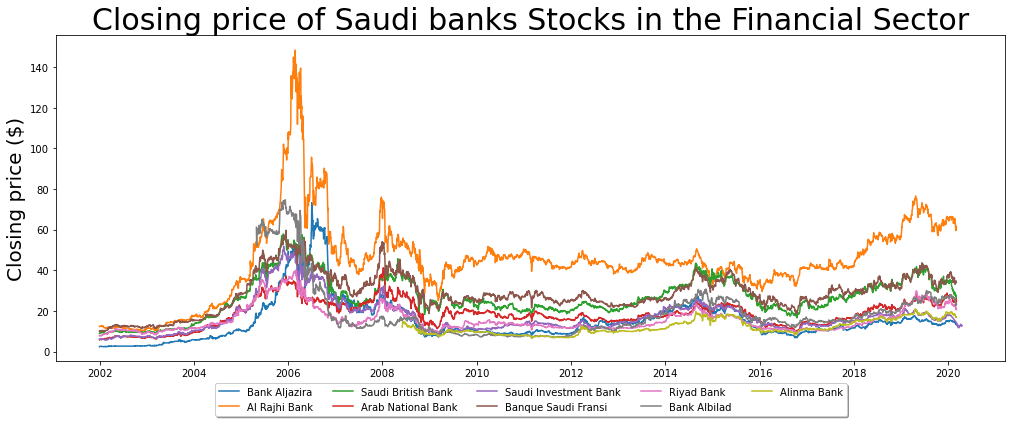

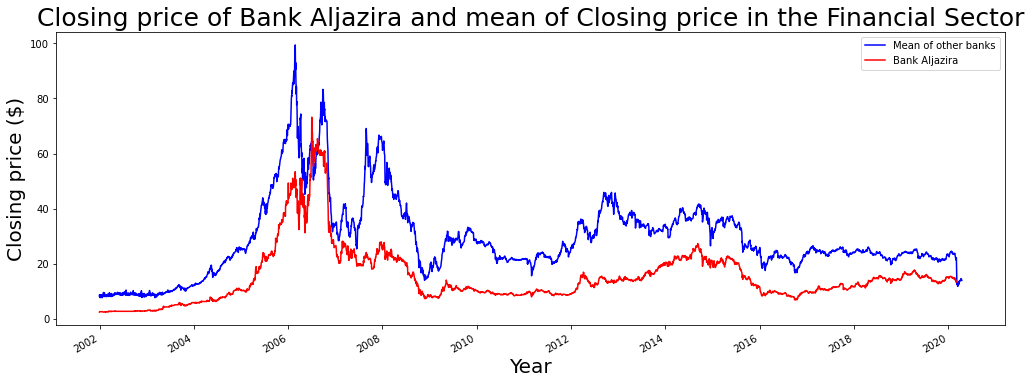

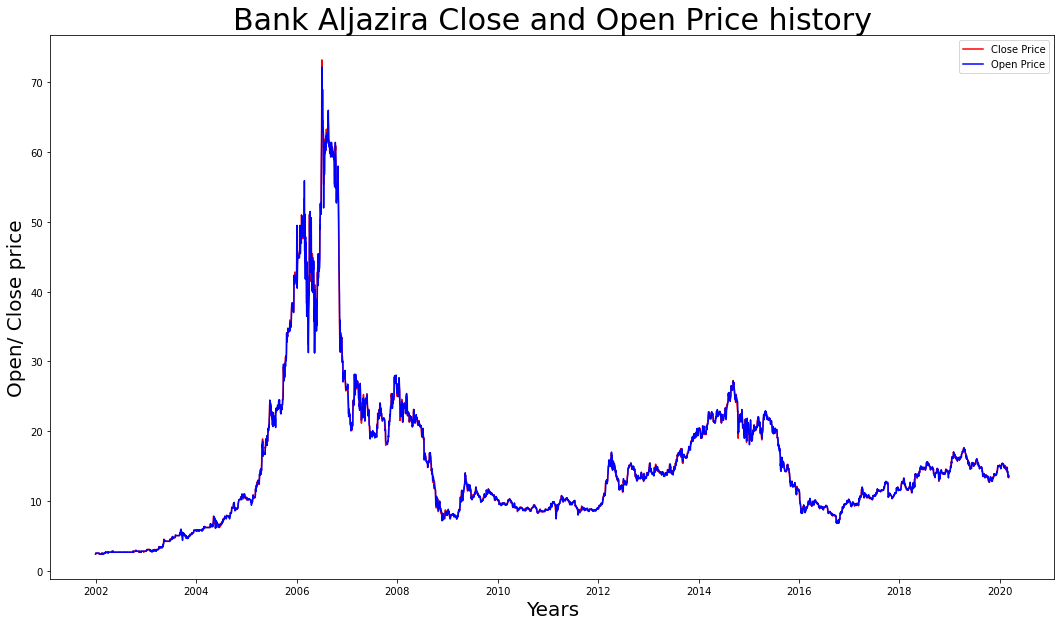

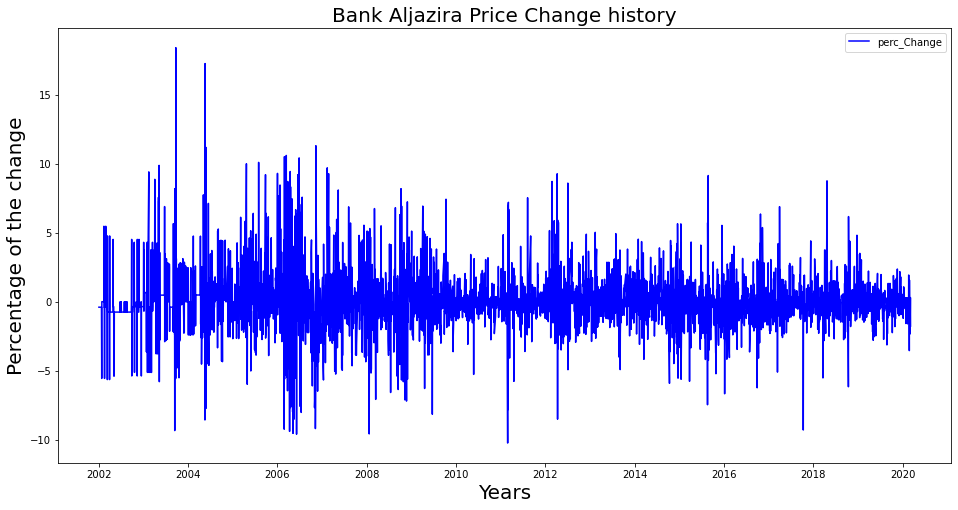

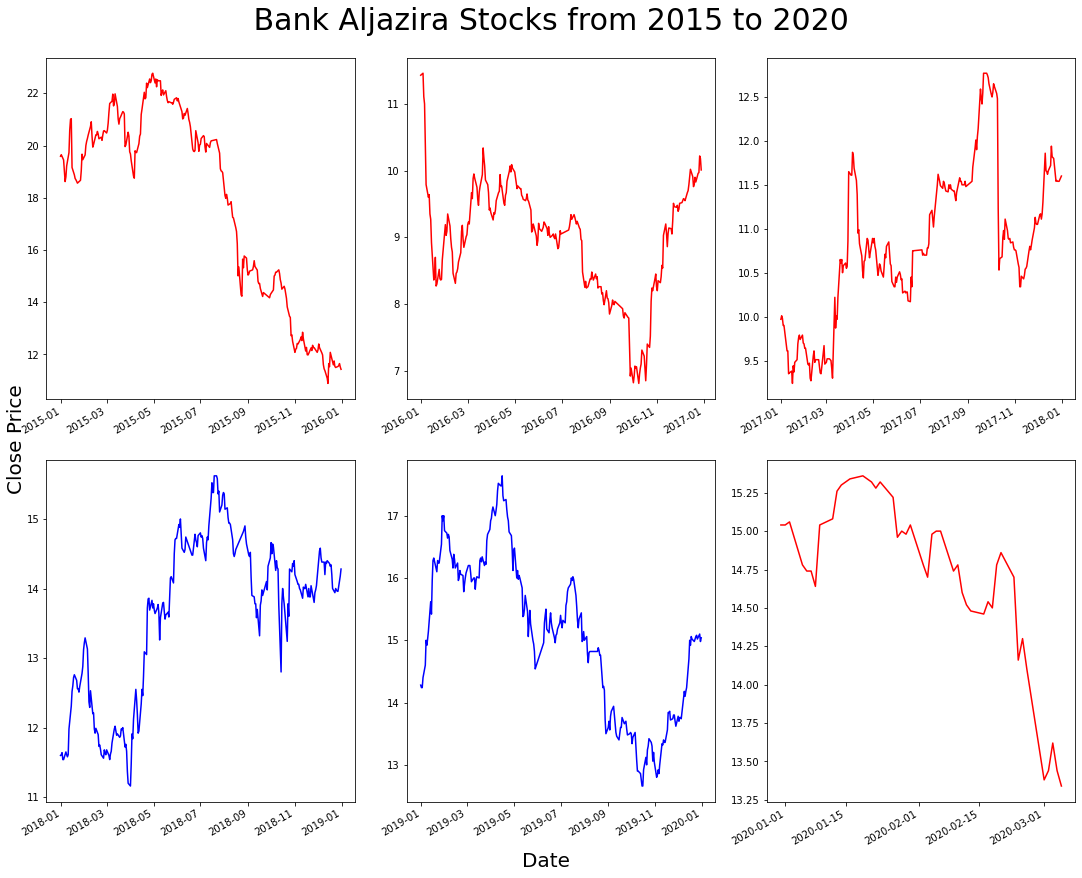

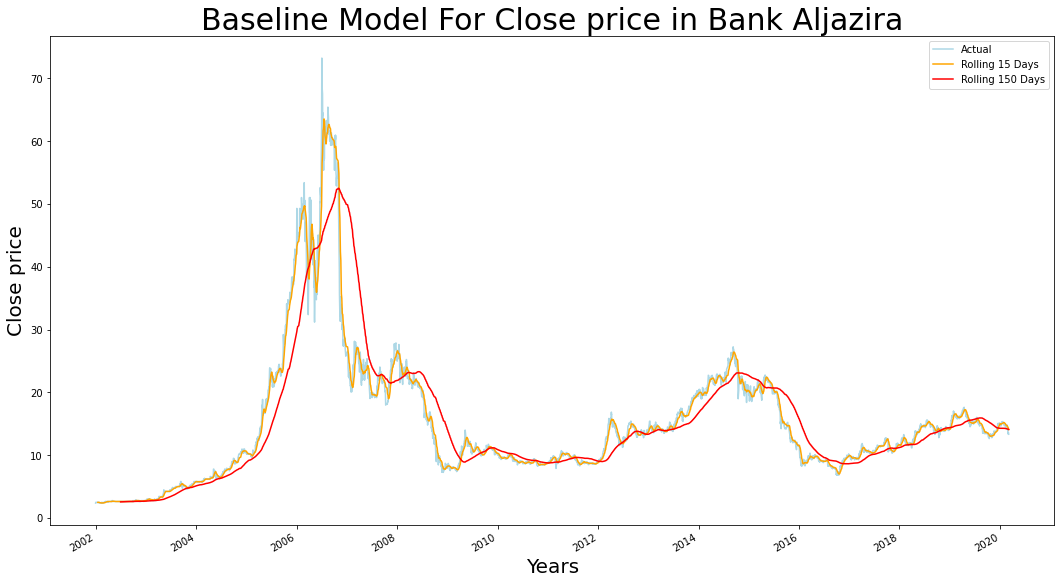

In [95]:
# Chosse then send on: df_BJAZ, df_ALRAJHI, df_SABB, df_ANB, df_SAIB, df_BSFR, df_RIBL, df_ALBILAD or df_ALINMA
eda(df_BJAZ)

## ML Model:  

In [97]:
def pred_price(df_x):
    
    """
    This function receiving one dataframe name to building the ML model 
    then, calculating the prediction of close price and plot it.  
    
    1- df_BJAZ (Al-Jazirah Bank DataFrame)
    2- df_ALRAJHI (Al-rajhi Bank DataFrame)
    3- df_SABB (Sabb Bank DataFrame)
    4- df_ANB (Arabic Bank DataFrame)
    5- df_SAIB (The Saudi Investment Bank DataFrame)
    6- df_BSFR (Banque Saudi Fransi DataFrame)
    7- df_RIBL (Al-Riyd Bank DataFrame)
    8- df_ALBILAD (ALBILAD Bank DataFrame)
    9-  df_ALINMA (ALINMA Bank DataFrame)
    """
    
    #Spilt Data Using TimeSeriesSplit
    
    X= df_x [['symbol', 'open', 'high', 'low', 'change', 'perc_Change', 'volume_traded ', 'value_traded',
          
          ]]
    y= df_x['close']


    tscv = TimeSeriesSplit(max_train_size=None, n_splits=5)
    for train_index, test_index in tscv.split(X):
        #print('TRAIN:', train_index, "TEST:" , test_index)
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    
    if(df_x['trading_name '][0]=='BJAZ') | (df_x['trading_name '][0]=="SABB") | (df_x['trading_name '][0]=="BSFR"):
        #ML model
        rf_model = RandomForestRegressor(n_estimators=15 , max_depth = 8)
        rf_model.fit(X_train , y_train)
        pred = rf_model.predict(X_train)
        print(f"Train: {mean_absolute_error(y_train, pred)}")
        print(f"Test: {mean_absolute_error(y_test, rf_model.predict(X_test))}")
        

        
    elif(df_x['trading_name '][0]=='ALRAJHI'):
        # ML model: RFT

        rf_model = RandomForestRegressor(n_estimators=40 , max_depth = 6)
        rf_model.fit(X_train , y_train)
        pred = rf_model.predict(X_train)
        print(f"Train: {mean_absolute_error(y_train, pred)}")
        print(f"Test: {mean_absolute_error(y_test, rf_model.predict(X_test))}")
        
    elif(df_x['trading_name '][0]=='ANB') | (df_x['trading_name '][0]=='RIBL'):
        # ML model: RFT
        
        rf_model = RandomForestRegressor(n_estimators=20 , max_depth = 5)
        rf_model.fit(X_train , y_train)
        pred = rf_model.predict(X_train)
        print(f"Train: {mean_absolute_error(y_train, pred)}")
        print(f"Test: {mean_absolute_error(y_test, rf_model.predict(X_test))}")

    elif(df_x['trading_name '][0]=='SAIB'):

        rf_model = RandomForestRegressor(n_estimators=30 , max_depth = 8)
        rf_model.fit(X_train , y_train)
        pred = rf_model.predict(X_train)
        print(f"Train: {mean_absolute_error(y_train, pred)}")
        print(f"Test: {mean_absolute_error(y_test, rf_model.predict(X_test))}")

        
    elif(df_x['trading_name '][0]=='ALBILAD'):
        # ML model: RFT
        
        rf_model = RandomForestRegressor(n_estimators=40 , max_depth = 6)
        rf_model.fit(X_train , y_train)
        pred = rf_model.predict(X_train)
        print(f"Train: {mean_absolute_error(y_train, pred)}")
        print(f"Test: {mean_absolute_error(y_test, rf_model.predict(X_test))}")

    elif(df_x['trading_name '][0]=='ALINMA'):

        rf_model = DecisionTreeRegressor(max_depth = 5)
        rf_model.fit(X_train , y_train)
        pred = rf_model.predict(X_train)
        print(f"Train: {mean_absolute_error(y_train, pred)}")
        print(f"Test: {mean_absolute_error(y_test, rf_model.predict(X_test))}")
        
        


    
    X_train["pred"] = pred
    #Plot prediction Vs Actual close price
    plt.figure(figsize=(18,10))
    y_train.plot(label="actual" , color = "red")
    X_train.pred.plot(label="pred" , color ="b")
    plt.ylabel("Close price",fontsize = 20)
    plt.xlabel("Years" ,fontsize = 20)
    plt.title(f'Actual Close price Vs Prediction Close price in {df_x["name"][0]}',fontsize = 30);
    plt.legend(["Actual" , f"Prediction RF model" ])
    plt.savefig('./image/7.png') # Save figure
    plt.show()



Train: 0.10928218680025763
Test: 0.1927656998738965


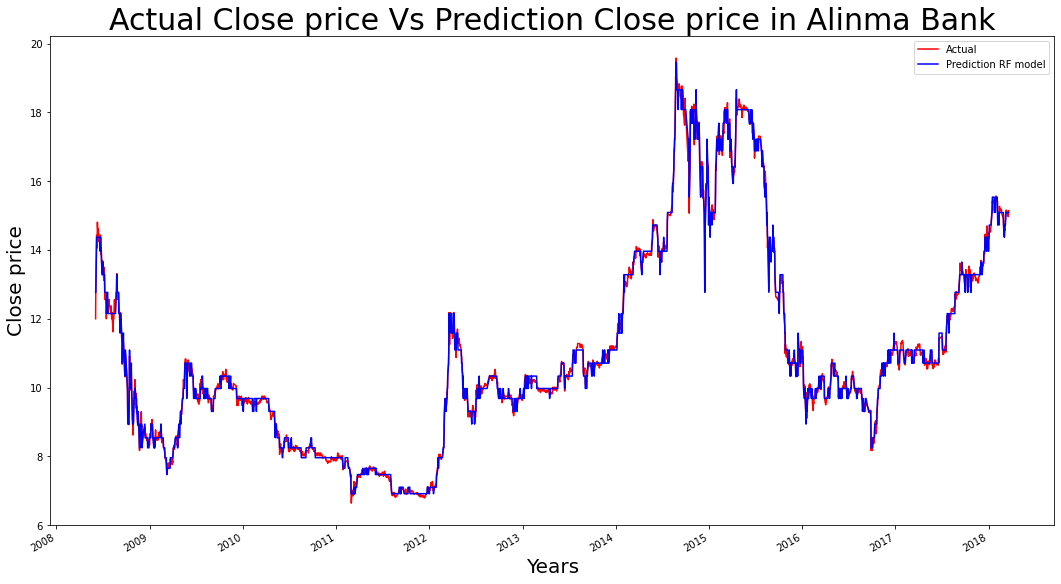

In [98]:
# Chosse then send on: df_BJAZ, df_ALRAJHI, df_SABB, df_ANB, df_SAIB, df_BSFR, df_RIBL, df_ALBILAD or df_ALINMA
pred_price(df_ALINMA)

# GUI

In [ ]:
try:
    import Tkinter as tk
except:
    import tkinter as tk
    
class SampleApp(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self._frame = None
        self.switch_frame(StartPage)

    def switch_frame(self, frame_class):
        new_frame = frame_class(self)
        if self._frame is not None:
            self._frame.destroy()
        self._frame = new_frame
        self._frame.grid(column=0, row=0)
    
    def plot(self, data):
        s = ttk.Style()
        s.configure('TNotebook.Tab', font=('URW Gothic L','11') )
        self.notebook = ttk.Notebook(self)
        graph_tab = tk.Frame(self.notebook)
        file_explorer_tab = tk.Frame(self.notebook)
        # Sets the Graph Tab as a Canvas where figures, images, etc. can be added
        self.graph_tab = tk.Canvas(graph_tab)
        self.graph_tab.grid(row=1, column=0)
        # Sets the file explorer tab as a text box 
        self.file_explorer_tab = tk.Canvas(file_explorer_tab)
        self.file_explorer_tab.grid(row=1, column=0)
        # Add the tabs to the GUI
        self.notebook.add(graph_tab, text='Bank Data Analysis')
        self.notebook.add(file_explorer_tab, text='Bank ML Model')
        self.notebook.grid(row=1, column=0,columnspan=1,sticky="nw")
        self.f3 = tk.Frame(self.graph_tab)
        
        #plot1
        d1=data["2002-1-3":"2020-12-31"]
        fig = Figure(figsize=(10,4.5))
        dft= Financials_df.groupby('date')['close'].mean()
        b = fig.add_subplot(111)
        b.plot(dft,color="b",label='Mean of other banks')
        b.plot(data["close"], color="r" , label=data["name"][0])
        b.legend(fontsize = 12),
        b.set_title(f'Closing price of {data["name"][0]} and mean of Closing price in the Financial Sector',fontsize = 15)
        b.set_ylabel('Closing price ($)',fontsize = 12)
        b.set_xlabel('Year',fontsize = 12)
        fig2 = Figure(figsize=(10,4.5))
        a = fig2.add_subplot(111)
        a.plot(d1["perc_Change"],label='perc_Change' , color = "b")
        a.set_ylabel("Percentage of the change",fontsize = 12 )
        a.set_xlabel("Years",fontsize = 12 )
        a.legend(fontsize = 12)
        a.set_title(f'{data["name"][0]} Price Change history',fontsize = 15);
        canvas1 = FigureCanvasTkAgg(fig, self.f3)
        canvas1.draw()
        toolbar1 = NavigationToolbar2Tk(canvas1, self.f3, pack_toolbar=False)
        toolbar1.update()
        canvas1.mpl_connect(
            "key_press_event", lambda event: print(f"you pressed {event.key}"))
        canvas1.mpl_connect("key_press_event", key_press_handler)
        canvas1.get_tk_widget().configure(background='#F0F0F0')
        canvas1.get_tk_widget().grid(row=1, column=0,columnspan=2)
        toolbar1.grid(row=2, column=0,columnspan=2)
        canvas3 = FigureCanvasTkAgg(fig2, self.f3)
        canvas3.draw()
        toolbar3 = NavigationToolbar2Tk(canvas3, self.f3, pack_toolbar=False)
        toolbar3.update()
        canvas3.mpl_connect(
            "key_press_event", lambda event: print(f"you pressed {event.key}"))
        canvas3.mpl_connect("key_press_event", key_press_handler)
        canvas3.get_tk_widget().configure(background='#F0F0F0')
        canvas3.get_tk_widget().grid(row=3, column=1,columnspan=2)
        toolbar3.grid(row=4, column=0,columnspan=2)
        self.f3.grid(row=1,column=0,columnspan=2,rowspan=5)
        
        #plot2
        self.f4 = tk.Frame(self.graph_tab)
        fig1 = Figure(figsize=(10,10))
        fig1.text(0.5, 0.04, 'Date', ha='center',fontsize = 15)
        fig1.text(0.04, 0.5, 'Close price', va='center', rotation='vertical',fontsize = 15)
        a = fig1.add_subplot(321)
         # 1st plot: From 2014 to 2015 
        a.plot(data["2014-12-31":"2015-12-31"].close,label="Close price" ,color=self.col_c("2014-12-31", "2015-12-31", data))
        a.tick_params(axis='x', rotation=20)
        b = fig1.add_subplot(322)
        b.plot(data["2015-12-31":"2016-12-31"].close,label="Close price" ,color=self.col_c("2015-12-31" ,"2016-12-31" , data))
        b.tick_params(axis='x', rotation=20)
        #fig3 = Figure(figsize=(10,3))
        c = fig1.add_subplot(323)
        c.plot(data["2016-12-31":"2017-12-31"].close,label="Close price" ,color=self.col_c("2016-12-31" ,"2017-12-31", data ))
        c.tick_params(axis='x', rotation=20)
        d = fig1.add_subplot(324)
        d.plot(data["2017-12-31":"2018-12-31"].close,label="Close price" , color=self.col_c("2017-12-31" ,"2018-12-31", data ))
        d.tick_params(axis='x', rotation=20)
        #fig4 = Figure(figsize=(10,3))
        e = fig1.add_subplot(325) 
        e.plot(data["2018-12-31":"2019-12-31"].close,label="Close price" ,color=self.col_c( "2018-12-31","2019-12-31" , data ))
        e.tick_params(axis='x', rotation=20)
        f = fig1.add_subplot(326)
        f.plot(data["2019-12-31":"2020-12-31"].close,label="Close price" , color=self.col_c("2019-12-31" , "2020-12-31" ,data ))
        f.tick_params(axis='x', rotation=20)
        
        #plt.tight_layout()
        
        

        canvas = FigureCanvasTkAgg(fig1,  self.f4)
        plt.xticks(rotation=45)
        canvas.draw()
        canvas.get_tk_widget().configure(background='#F0F0F0')
        canvas.get_tk_widget().grid(row=1, column=3,columnspan=1,rowspan=1)
        self.f4.grid(row=1,column=2,columnspan=2,rowspan=1)
        
        #Albilad_ML tab
        X= data[['symbol', 'open', 'high', 'low', 'change', 'perc_Change', 'volume_traded ', 'value_traded']]
        y= data['close']
        tscv = TimeSeriesSplit(max_train_size=None, n_splits=5)
        for train_index, test_index in tscv.split(X):
            #print('TRAIN:', train_index, "TEST:" , test_index)
            X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        if(data['trading_name '][0]=='BJAZ') | (data['trading_name '][0]=="SABB") | (data['trading_name '][0]=="BSFR"):
            #ML model
            rf_model = RandomForestRegressor(n_estimators=15 , max_depth = 8)
            rf_model.fit(X_train , y_train)
            pred = rf_model.predict(X_train)
            pred1= rf_model.predict(X_test)
        elif(data['trading_name '][0]=='ALRAJHI'):
            rf_model = RandomForestRegressor(n_estimators=40 , max_depth = 6)
            rf_model.fit(X_train , y_train)
            pred = rf_model.predict(X_train)
            pred1= rf_model.predict(X_test)
        elif(data['trading_name '][0]=='ANB') | (data['trading_name '][0]=='RIBL'):
            rf_model = RandomForestRegressor(n_estimators=20 , max_depth = 5)
            rf_model.fit(X_train , y_train)
            pred = rf_model.predict(X_train)
            pred1= rf_model.predict(X_test)
        elif(data['trading_name '][0]=='SAIB'):
            rf_model = RandomForestRegressor(n_estimators=30 , max_depth = 8)
            rf_model.fit(X_train , y_train)
            pred = rf_model.predict(X_train)
            pred1= rf_model.predict(X_test)
        elif(data['trading_name '][0]=='ALBILAD'):
            rf_model = RandomForestRegressor(n_estimators=40 , max_depth = 6)
            rf_model.fit(X_train , y_train)
            pred = rf_model.predict(X_train)
            pred1= rf_model.predict(X_test)
        elif(data['trading_name '][0]=='ALINMA'):
            rf_model = DecisionTreeRegressor(max_depth = 5)
            rf_model.fit(X_train , y_train)
            pred = rf_model.predict(X_train)
            pred1= rf_model.predict(X_test)
        X_train["pred"]=pred
        self.showResults = mean_absolute_error(y_test, pred1)
        self.f2 = tk.Frame(self.file_explorer_tab,bg="#3A7FF6")
        tk.Label(self.f2, text= "\nML Model is:",bg="#3A7FF6",fg="white",justify="left",font=("Arial-BoldMT",int(22.0))).grid(
            row=1, column=0 , pady=20)
        if(data['trading_name '][0]=='ALINMA'):
            tk.Label(self.f2, text= "Decision Tree Regressor",bg="#3A7FF6",fg="white", justify="left",font=("Georgia",int(18.0))).grid(
            row=2, column=0, pady=20)
        else:
            tk.Label(self.f2, text= "Random Forest Regressor",bg="#3A7FF6",fg="white", justify="left",font=("Georgia",int(18.0))).grid(
            row=2, column=0, pady=20)
        tk.Label(self.f2, text= "Mean Absolute Error :",bg="#3A7FF6",fg="white",justify="left",font=("Georgia",int(18.0))).grid(
            row=3, column=0, pady=5)
        tk.Label(self.f2, text=self.showResults ,bg="#3A7FF6",fg="white", justify="left",font=("Georgia",int(18.0))).grid(
            row=4, column=0, pady=5)
        tk.Label(self.f2, text="\n By using this model we haves\n"
                   "great prediction results and \n"
                    "small mean absolute error.\n\n"
                   "As you see in next figure \n"
                   "we have a small difference \n"
                   "between the actual close price \n"
                 "and the predicted value.\n\n",
              bg="#3A7FF6",fg="white",justify="left",font=("Georgia",int(18.0))).grid(
            row=5, column=0, pady=5)      
        know_more = tk.Label(self.f2,text="Click here for information \n\n\n\n\n\n\n\n", justify="left",bg="#3A7FF6",fg="white", cursor="hand2")
        know_more.grid(row=6, column=0)
        know_more.bind('<Button-1>', self.know_more_clicked)
        self.f2.grid(row=1, column=0,columnspan=2,rowspan=5)
        self.f5 = tk.Frame(self.file_explorer_tab)
        #Plot prediction Vs Actual close price
        fig = Figure(figsize=(12,9.40))
        a = fig.add_subplot(111)
        a.plot(y_train,label="actual" , color = "red")
        a.plot(X_train["pred"],label="pred" , color ="b")
        a.set_ylabel("Close price" ,fontsize = 15)
        a.set_xlabel("Years",fontsize = 15 )
        a.legend(["Actual" , f"Prediction RF model" ],fontsize = 15)
        a.set_title('Actual Close price Vs Prediction Close price',fontsize = 20);
        canvas2 = FigureCanvasTkAgg(fig,self.f5)
        #canvas.get_tk_widget().grid(row=6, column=1,columnspan=4)
        canvas2.draw()
        toolbar2 = NavigationToolbar2Tk(canvas2, self.f5, pack_toolbar=False)
        toolbar2.update()
        canvas2.mpl_connect(
            "key_press_event", lambda event: print(f"you pressed {event.key}"))
        canvas2.mpl_connect("key_press_event", key_press_handler)
        toolbar2.grid(row=5, column=3,columnspan=1)
        
        canvas2.get_tk_widget().grid(row=2, column=3,columnspan=1,rowspan=3)
        self.f5.grid(row=1, column=3,columnspan=1,rowspan=3)
        
    def know_more_clicked(self,event):
        url = "https://github.com/RazanAlsallumi/Saudi_Stock_Exchange/blob/main/README.md"
        webbrowser.open_new(url)
        
    def col_c(self,start,end , df):
        if df[start : end].change.sum() >= 0:
            return "b"
        else:
            return "r"

class StartPage(tk.Frame):
    def __init__(self, master):
        tk.Frame.__init__(self, master)
        self.master.geometry(('1400x1000'))
        
        self.master.title("Saudi Stock Exchange (Tadawul)")
        tk.Label(self, text="Welcome to Saudi Stock Exchange (Tadawul) for Saudi banks!", 
                 font=('Helvetica', 12)).grid(row=0)
        #self.image = ImageTk.PhotoImage(Image.open('./image/tadawul.jpg'))
        image = Image.open("./image/tadawul.jpg")
        image = image.resize((1400, 400))
        self.image = ImageTk.PhotoImage(image)
        self.gmail = tk.Label(self, image=self.image)
        self.gmail.grid(row=1)
        #Albilad Bank
        image = Image.open("./image/Bank-Albilad-Logo.jpg")
        image = image.resize((210, 120))
        self.img1 = ImageTk.PhotoImage(image)
        #Aljazira Bank
        image = Image.open("./image/Bank-Aljazira-Logo.jpg")
        image = image.resize((210, 120))
        self.img2 = ImageTk.PhotoImage(image)
        #Alinma Bank
        image = Image.open("./image/Alinma-Bank-Logo.jpg")
        image = image.resize((210, 120))
        self.img3 = ImageTk.PhotoImage(image)
        #AlRajhi Bank
        image = Image.open("./image/Alrajhi.jpg")
        image = image.resize((210, 120))
        self.img4 = ImageTk.PhotoImage(image)
        #Arab National Bank
        image = Image.open("./image/arab-national-bank-600px-logo.png")
        image = image.resize((210, 120))
        self.img5 = ImageTk.PhotoImage(image)
        #Riyad Bank
        image = Image.open("./image/riyad.png")
        image = image.resize((210, 120))
        self.img6 = ImageTk.PhotoImage(image)
        #Saudi British Bank
        image = Image.open("./image/20190426120603.jpg")
        image = image.resize((210, 120))
        self.img7 = ImageTk.PhotoImage(image)
        #Saudi Investment Bank
        image = Image.open("./image/PR-Logo-saib.jpg")
        image = image.resize((210, 120))
        self.img8 = ImageTk.PhotoImage(image)
        #Saudi Fransi Bank
        image = Image.open("./image/Banque-Saudi-Fransi-Logo.jpg")
        image = image.resize((210, 120))
        self.img9 = ImageTk.PhotoImage(image)
        # banks buttons
        self.f = tk.Frame(self)
        self.button_Albilad = tk.Button(self.f,text="Albilad Bank",width=250,height=180, image = self.img1,compound="top",
                                        command=lambda: master.switch_frame(AlbiladPage))
        self.button_Albilad.grid(column=2, row=2,padx=5, pady=5)
        
        self.button_Aljazira = tk.Button(self.f,text="Aljazira Bank",width=250,height=180, image = self.img2,compound="top",
                                        command=lambda: master.switch_frame(AljaziraPage))
        self.button_Aljazira.grid(column=3, row=2,padx=5, pady=5)
        
        self.button_Alinma = tk.Button(self.f,text="Alinma Bank",width=250,height=180, image = self.img3,compound="top",
                                        command=lambda: master.switch_frame(AlinmaPage))
        self.button_Alinma.grid(column=4, row=2,padx=5, pady=5)
        
        self.button_AlRajhi = tk.Button(self.f,text="AlRajhi Bank",width=250,height=180, image = self.img4,compound="top",
                                        command=lambda: master.switch_frame(AlRajhiPage))
        self.button_AlRajhi.grid(column=5, row=2,padx=5, pady=5)
        
        self.button_ArabNational = tk.Button(self.f,text="Arab National Bank",width=250,height=180, image = self.img5,compound="top",
                                        command=lambda: master.switch_frame(ArabNationalPage))
        self.button_ArabNational.grid(column=6, row=2,padx=5, pady=5)
        
        self.f.grid(row=3)
        self.f1 = tk.Frame(self)
        
        self.button_Riyad = tk.Button(self.f1,text="Riyad Bank",width=250,height=180, image = self.img6,compound="top",
                                        command=lambda: master.switch_frame(RiyadPage))
        self.button_Riyad.grid(column=1, row=2,padx=5, pady=5)
        
        self.button_SaudiBritish = tk.Button(self.f1,text="Saudi British Bank",width=250,height=180, image = self.img7,compound="top",
                                        command=lambda: master.switch_frame(SaudiBritishPage))
        self.button_SaudiBritish.grid(column=2, row=2,padx=5, pady=5)
        
        self.button_SaudiInvestment = tk.Button(self.f1,text="Saudi Investment Bank",width=250,height=180, image = self.img8,compound="top",
                                        command=lambda: master.switch_frame(SaudiInvestmentPage))
        self.button_SaudiInvestment.grid(column=3, row=2,padx=5, pady=5)
        
        self.button_SaudiFransi = tk.Button(self.f1,text="Saudi Fransi Bank",width=250,height=180, image = self.img9,compound="top",
                                        command=lambda: master.switch_frame(SaudiFransiPage))
        self.button_SaudiFransi.grid(column=4, row=2,padx=5, pady=5)
        self.f1.grid(row=4)

class AlbiladPage(tk.Frame):
    def __init__(self, master):
        tk.Frame.__init__(self, master)
        #back icon
        image = Image.open("./image/arrow-back-icon.png")
        image = image.resize((50, 50))
        self.imgback = ImageTk.PhotoImage(image)
        self.f1 = tk.Frame(self)
        tk.Button(self.f1, text="Go back to start page",image = self.imgback,borderwidth=0, highlightthickness=0,
                  command=lambda: master.switch_frame(StartPage)).grid(row=0, column=0)
        tk.Label(self.f1, text="Albilad Bank", font=('Georgia', 35, "bold"),fg='#3A7FF6').grid(row=0, column=1,padx=20)
        self.f1.grid(row=0,column=0,columnspan=2)
        master.plot(df_ALBILAD)
     

        
class AljaziraPage(tk.Frame):
    def __init__(self, master):
        tk.Frame.__init__(self, master)
        #back icon
        image = Image.open("./image/arrow-back-icon.png")
        image = image.resize((50, 50))
        self.imgback = ImageTk.PhotoImage(image)
        self.f1 = tk.Frame(self)
        tk.Button(self.f1, text="Go back to start page",image = self.imgback,borderwidth=0, highlightthickness=0,
                  command=lambda: master.switch_frame(StartPage)).grid(row=0, column=0)
        tk.Label(self.f1, text="Aljazira Bank", font=('Georgia', 35, "bold"),fg='#3A7FF6').grid(row=0, column=1,padx=20)
        self.f1.grid(row=0,column=0,columnspan=2)
        master.plot(df_BJAZ)
        
class AlinmaPage(tk.Frame):
    def __init__(self, master):
        tk.Frame.__init__(self, master)
        #back icon
        image = Image.open("./image/arrow-back-icon.png")
        image = image.resize((50, 50))
        self.imgback = ImageTk.PhotoImage(image)
        self.f1 = tk.Frame(self)
        tk.Button(self.f1, text="Go back to start page",image = self.imgback,borderwidth=0, highlightthickness=0,
                  command=lambda: master.switch_frame(StartPage)).grid(row=0, column=0)
        tk.Label(self.f1, text="Alinma Bank", font=('Georgia', 35, "bold"),fg='#3A7FF6').grid(row=0, column=1,padx=20)
        self.f1.grid(row=0,column=0,columnspan=2)
        master.plot(df_ALINMA)
        
class AlRajhiPage(tk.Frame):
    def __init__(self, master):
        tk.Frame.__init__(self, master)
        #back icon
        image = Image.open("./image/arrow-back-icon.png")
        image = image.resize((50, 50))
        self.imgback = ImageTk.PhotoImage(image)
        self.f1 = tk.Frame(self)
        tk.Button(self.f1, text="Go back to start page",image = self.imgback,borderwidth=0, highlightthickness=0,
                  command=lambda: master.switch_frame(StartPage)).grid(row=0, column=0)
        tk.Label(self.f1, text="AlRajhi Bank", font=('Georgia', 35, "bold"),fg='#3A7FF6').grid(row=0, column=1,padx=20)
        self.f1.grid(row=0,column=0,columnspan=2)
        master.plot(df_ALRAJHI)
        
class ArabNationalPage(tk.Frame):
    def __init__(self, master):
        tk.Frame.__init__(self, master)
        #back icon
        image = Image.open("./image/arrow-back-icon.png")
        image = image.resize((50, 50))
        self.imgback = ImageTk.PhotoImage(image)
        self.f1 = tk.Frame(self)
        tk.Button(self.f1, text="Go back to start page",image = self.imgback,borderwidth=0, highlightthickness=0,
                  command=lambda: master.switch_frame(StartPage)).grid(row=0, column=0)
        tk.Label(self.f1, text="Arab National Bank", font=('Georgia', 35, "bold"),fg='#3A7FF6').grid(row=0, column=1,padx=20)
        self.f1.grid(row=0,column=0,columnspan=2)
        master.plot(df_ANB)
    
class RiyadPage(tk.Frame):
    def __init__(self, master):
        tk.Frame.__init__(self, master)
        #back icon
        image = Image.open("./image/arrow-back-icon.png")
        image = image.resize((50, 50))
        self.imgback = ImageTk.PhotoImage(image)
        self.f1 = tk.Frame(self)
        tk.Button(self.f1, text="Go back to start page",image = self.imgback,borderwidth=0, highlightthickness=0,
                  command=lambda: master.switch_frame(StartPage)).grid(row=0, column=0)
        tk.Label(self.f1, text="Riyad Bank", font=('Georgia', 35, "bold"),fg='#3A7FF6').grid(row=0, column=1,padx=20)
        self.f1.grid(row=0,column=0,columnspan=2)
        master.plot(df_RIBL)
        
class SaudiBritishPage(tk.Frame):
    def __init__(self, master):
        tk.Frame.__init__(self, master)
        #back icon
        image = Image.open("./image/arrow-back-icon.png")
        image = image.resize((50, 50))
        self.imgback = ImageTk.PhotoImage(image)
        self.f1 = tk.Frame(self)
        tk.Button(self.f1, text="Go back to start page",image = self.imgback,borderwidth=0, highlightthickness=0,
                  command=lambda: master.switch_frame(StartPage)).grid(row=0, column=0)
        tk.Label(self.f1, text="Saudi British Bank", font=('Georgia', 35, "bold"),fg='#3A7FF6').grid(row=0, column=1,padx=20)
        self.f1.grid(row=0,column=0,columnspan=2)
        master.plot(df_SABB)

class SaudiInvestmentPage(tk.Frame):
    def __init__(self, master):
        tk.Frame.__init__(self, master)
        #back icon
        image = Image.open("./image/arrow-back-icon.png")
        image = image.resize((50, 50))
        self.imgback = ImageTk.PhotoImage(image)
        self.f1 = tk.Frame(self)
        tk.Button(self.f1, text="Go back to start page",image = self.imgback,borderwidth=0, highlightthickness=0,
                  command=lambda: master.switch_frame(StartPage)).grid(row=0, column=0)
        tk.Label(self.f1, text="Saudi Investment Bank", font=('Georgia', 35, "bold"),fg='#3A7FF6').grid(row=0, column=1,padx=20)
        self.f1.grid(row=0,column=0,columnspan=2)
        master.plot(df_SABB)

class SaudiFransiPage(tk.Frame):
    def __init__(self, master):
        tk.Frame.__init__(self, master)
        #back icon
        image = Image.open("./image/arrow-back-icon.png")
        image = image.resize((50, 50))
        self.imgback = ImageTk.PhotoImage(image)
        self.f1 = tk.Frame(self)
        tk.Button(self.f1, text="Go back to start page",image = self.imgback,borderwidth=0, highlightthickness=0,
                  command=lambda: master.switch_frame(StartPage)).grid(row=0, column=0)
        tk.Label(self.f1, text="Saudi Fransi Bank", font=('Georgia', 35, "bold"),fg='#3A7FF6').grid(row=0, column=1,padx=20)
        self.f1.grid(row=0,column=0,columnspan=2)
        master.plot(df_BSFR)
        
        
if __name__ == "__main__":
    app = SampleApp()
    app.mainloop()

In [ ]:
plt.savefig(“sample.png”, dpi=150)